In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [88]:
def load_dataset():
    train_dataset = h5py.File("C:\\Users\\SusmitPC_3\\Documents\\datasets\\train_catvnoncat.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File("C:\\Users\\SusmitPC_3\\Documents\\datasets\\test_catvnoncat.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

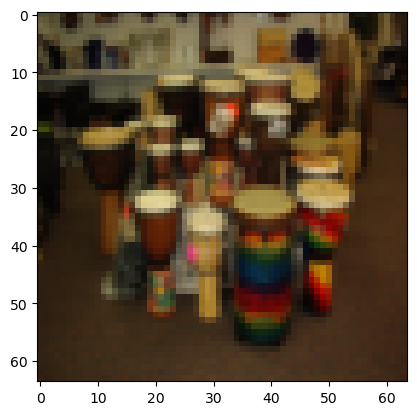

In [5]:
index = 5
plt.imshow(train_set_x_orig[index])

In [6]:
train_set_y.shape

(1, 209)

In [7]:
train_set_x_orig.shape

(209, 64, 64, 3)

training set has 209 image examples of size 64 x 64 x 3

flatten training set to 209 column vectors of size (64.64.3,1). Hence x has shape (64.64.3, 209) or (209, 64.64.3).T

In [8]:
train_set_x_orig=train_set_x_orig.reshape(209,-1).T

In [9]:
train_set_x_orig.shape

(12288, 209)

similarly for test set:

In [10]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [11]:
test_set_x_orig=test_set_x_orig.reshape(50,-1).T

In [12]:
test_set_x_orig.shape

(12288, 50)

normalise

In [13]:
train_X=train_set_x_orig/255
test_X=test_set_x_orig/255

In [14]:
def sig(z):
    s=1/(1+np.exp(-z))
    return s

In [76]:
def param_shape(dim):
    w=np.zeros(shape=(dim,1))
    b=0
    return w,b

In [77]:
def forward(w,b,x,y):
    #no of training example=m
    m=x.shape[1]
    A=sig(np.dot(w.T,x)+b)
    cost = (-1/m) * np.sum(y * np.log(A) + (1 - y) * (np.log(1 - A)))    
    dw=(1/m)*(np.dot(x,(A-y).T))
    db=(1/m)*np.sum(A-y)
    cost = np.squeeze(cost)
    return dw, db, cost

In [78]:
def back(w,b,x,y, num_it, lr, print_cost = False):
    cost_arr=[]
    for i in range(num_it):
        dw, db, cost=forward(w,b,x,y)
        w=w-lr*dw
        b=b-lr*db
        if i%100==0:
            cost_arr.append(cost)
            
        if print_cost and i % 100 == 0:
            print (f"Cost after iteration {i} : {cost}")
            
    return w,b,dw,db,cost_arr

In [79]:
def predict(w,b,x):
    m=x.shape[1]
    y_pred=np.zeros((1,m))
    w=w.reshape((x.shape[0],1))
    A=sig(np.dot(w.T,x)+b)
    
    for i in range(A.shape[1]):
        y_pred[0, i] = 1 if A[0, i] > 0.5 else 0

    return y_pred

In [80]:
def model(x_train, y_train, x_test, y_test, num_it=2000, lr=0.05, print_cost=False):
    w,b=param_shape(x_train.shape[0])
    w,b,dw,db,cost_arr=back(w,b,x_train, y_train, num_it, lr, print_cost)
    y_pred_train=predict(w,b,x_train)
    y_pred_test=predict(w,b,x_test)
    print(f"train accuracy: {(100 - np.mean(np.abs(y_pred_train - y_train)) * 100)} %")
    print(f"test accuracy: {(100 - np.mean(np.abs(y_pred_test - y_test)) * 100)} %")
    return cost_arr, y_pred_test, y_pred_train, w,b,lr,num_it

In [85]:
cost_arr, y_pred_test, y_pred_train, w,b,lr,num_it=model(train_X, train_set_y, test_X, test_set_y, 50000, 0.005, print_cost=True)

Cost after iteration 0 : 0.6931471805599453
Cost after iteration 100 : 0.5845083636993086
Cost after iteration 200 : 0.4669490409465546
Cost after iteration 300 : 0.37600686694802077
Cost after iteration 400 : 0.3314632893282512
Cost after iteration 500 : 0.3032730674743829
Cost after iteration 600 : 0.2798795865826048
Cost after iteration 700 : 0.2600421369258757
Cost after iteration 800 : 0.24294068467796612
Cost after iteration 900 : 0.22800422256726066
Cost after iteration 1000 : 0.21481951378449646
Cost after iteration 1100 : 0.20307819060644994
Cost after iteration 1200 : 0.1925442771670686
Cost after iteration 1300 : 0.18303333796883509
Cost after iteration 1400 : 0.17439859438448874
Cost after iteration 1500 : 0.16652139705400335
Cost after iteration 1600 : 0.1593045182975662
Cost after iteration 1700 : 0.1526673247129651
Cost after iteration 1800 : 0.14654223503982336
Cost after iteration 1900 : 0.14087207570310165
Cost after iteration 2000 : 0.1356080752591201
Cost after iter

Cost after iteration 16900 : 0.01900226569251215
Cost after iteration 17000 : 0.018889055384854896
Cost after iteration 17100 : 0.018777163013043854
Cost after iteration 17200 : 0.018666565958759745
Cost after iteration 17300 : 0.018557242113980844
Cost after iteration 17400 : 0.01844916986676341
Cost after iteration 17500 : 0.018342328087492206
Cost after iteration 17600 : 0.01823669611558414
Cost after iteration 17700 : 0.018132253746626782
Cost after iteration 17800 : 0.018028981219936444
Cost after iteration 17900 : 0.01792685920651858
Cost after iteration 18000 : 0.017825868797416752
Cost after iteration 18100 : 0.01772599149243507
Cost after iteration 18200 : 0.017627209189220103
Cost after iteration 18300 : 0.017529504172689434
Cost after iteration 18400 : 0.01743285910479393
Cost after iteration 18500 : 0.017337257014601416
Cost after iteration 18600 : 0.01724268128869044
Cost after iteration 18700 : 0.017149115661842237
Cost after iteration 18800 : 0.017056544208021256
Cost af

Cost after iteration 33400 : 0.009503622313782104
Cost after iteration 33500 : 0.009474723241189283
Cost after iteration 33600 : 0.009445997883895467
Cost after iteration 33700 : 0.009417444689447683
Cost after iteration 33800 : 0.009389062123753992
Cost after iteration 33900 : 0.009360848670813797
Cost after iteration 34000 : 0.009332802832452901
Cost after iteration 34100 : 0.009304923128063315
Cost after iteration 34200 : 0.00927720809434723
Cost after iteration 34300 : 0.009249656285066004
Cost after iteration 34400 : 0.00922226627079282
Cost after iteration 34500 : 0.00919503663867028
Cost after iteration 34600 : 0.009167965992171756
Cost after iteration 34700 : 0.009141052950866828
Cost after iteration 34800 : 0.009114296150191027
Cost after iteration 34900 : 0.009087694241219265
Cost after iteration 35000 : 0.009061245890443227
Cost after iteration 35100 : 0.009034949779552468
Cost after iteration 35200 : 0.009008804605219385
Cost after iteration 35300 : 0.008982809078887601
Cos

Cost after iteration 49800 : 0.00632795408763273
Cost after iteration 49900 : 0.006315054873472232
train accuracy: 100.0 %
test accuracy: 72.0 %


Not Cat


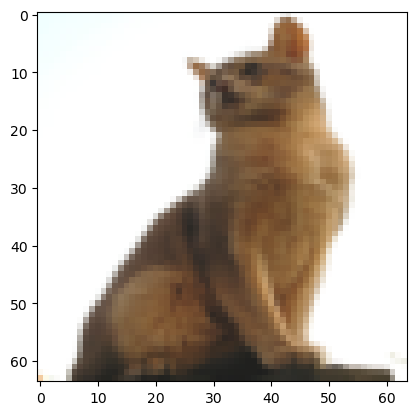

In [84]:
index = 6
plt.imshow(test_X[:,index].reshape((64, 64, 3)))
if (y_pred_test[0, index]==0):
    print("Not Cat")
else: 
    print("Cat")

In [86]:
for i in range(50):
    if y_pred_test[0,i]==0:
        print(i)

5
6
10
11
14
16
18
19
21
22
24
27
28
30
34
35
36
38
39
41
43
46
49
